In [5]:
from diffusers import StableDiffusionPipeline
from lora_diffusion import patch_pipe, tune_lora_scale, image_grid
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/simo/anaconda3/envs/pytorch_latest/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [10]:
patch_pipe(pipe, "./step_1000.safetensors")

<s1>
The tokenizer already contains the token <s1>.
Replacing <s1> embedding.
<s2>
The tokenizer already contains the token <s2>.
Replacing <s2> embedding.


In [19]:
SC = 0.8
pipe.unet.eval()
tune_lora_scale(pipe.unet, SC)
tune_lora_scale(pipe.text_encoder, SC)
img_prmpts = [
    "detailed photo of <obj>, detailed face, a brown cloak, brown steampunk corset, belt, virtual youtuber, cowboy shot, feathers in hair, feather hair ornament, white shirt, brown gloves, shooting arrows",
    "<obj> steampunk, fantasy, eerie, intricate details, digital painting, artstation, concept art, 8 k, art by artgerm and alohonse mucha and eiichiro oda",
    "<obj> wild brush strokes, concept art, award - winning photography, cinematic, wlop, color block, pop, hip, art by andy warhol, pixiv art, yoshitaka amano",
    "a photo of <obj> in advanced organic armor, biological filigree, detailed symmetric face, flowing hair, neon details, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, octane, art by Krenz Cushart , Artem Demura, Alphonse Mucha, digital cgi art 8K HDR by Yuanyuan Wang photorealistic",
    "a photo of <obj> on the beach, small waves, detailed symmetric face, beautiful composition",
    "a photo of <obj>, detailed face, rainbow background, wlop, dan mumford, artgerm, liam brazier, peter mohrbacher, jia zhangke, 8 k, raw, featured in artstation, octane render, cinematic, elegant, intricate, 8 k",
]

pipe.safety_checker = None
neg_prompt = "out of frame, duplicate, watermark, signature, text, sexual, nsfw"

outs = []
for idx, prompt in enumerate(img_prmpts):
    prompt = prompt.replace("<obj>", "<s1><s2>")
    torch.manual_seed(idx)
    image = pipe(
        prompt,
        negative_prompt=neg_prompt,
        num_inference_steps=30,
        guidance_scale=5.5,
        height=512,
        width=512,
    ).images[0]
    outs.append(image)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['uan wang photorealistic']


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

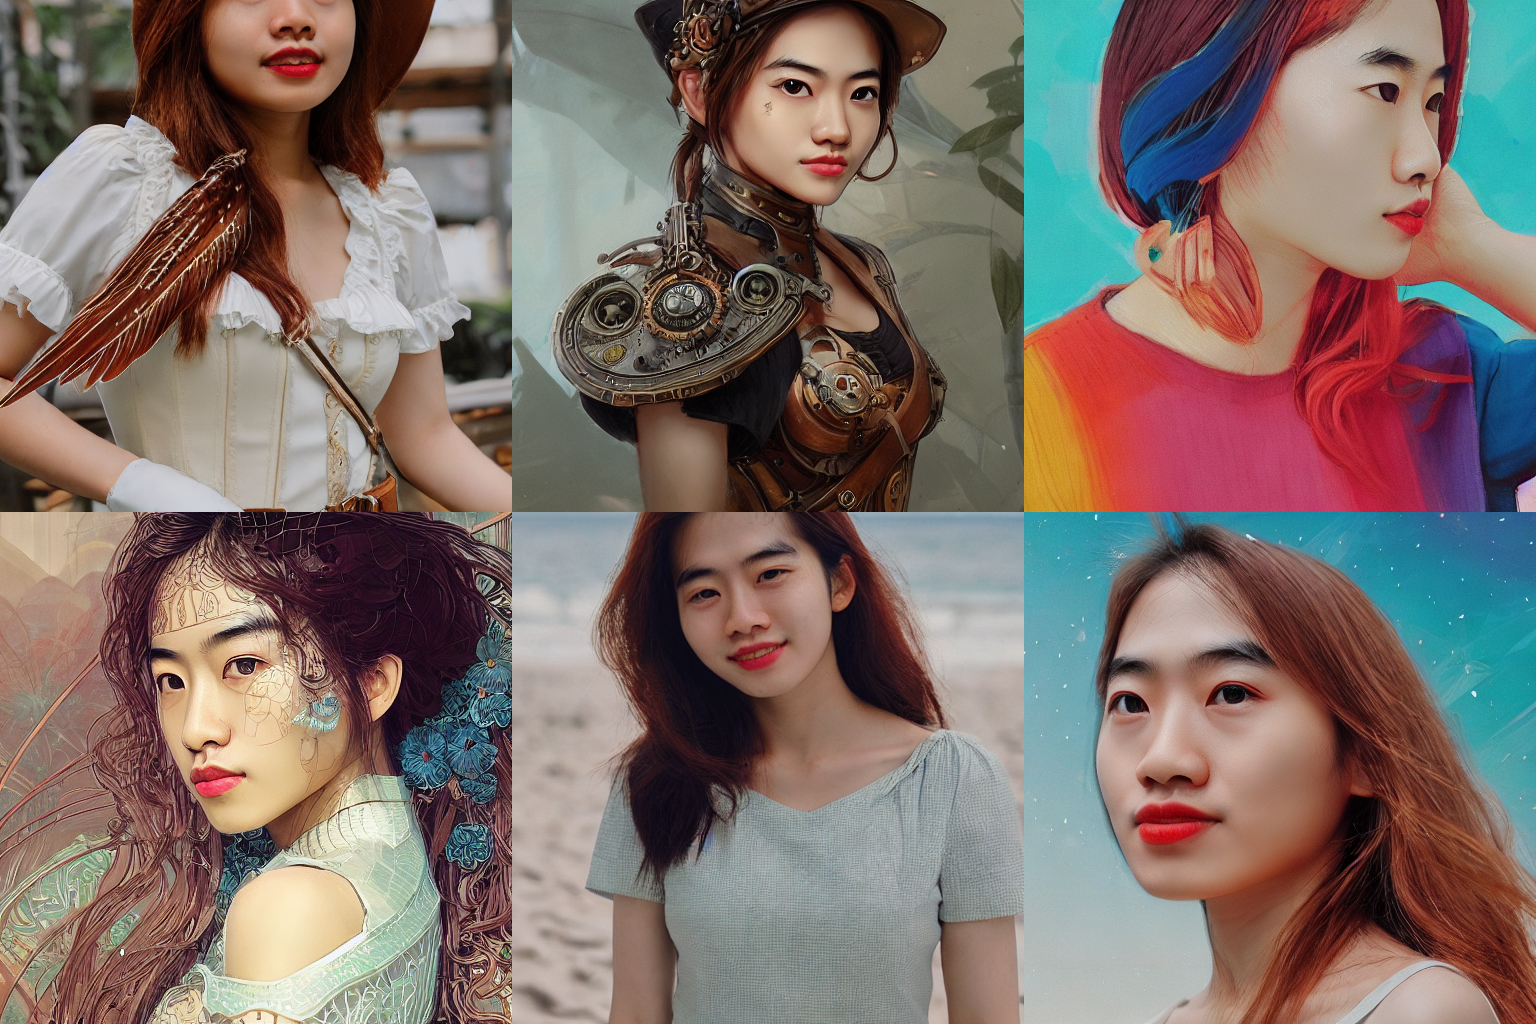

In [20]:
image_grid(outs, 2, 3)